# Sudoku Solver Program

#### Importing Libraries

In [128]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten, Dropout

from keras import utils, preprocessing
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras import models

import matplotlib.pyplot as plt

import PIL

import os

from imutils import paths

import cv2

import numpy as np

# ---------------------------------------------------------------------------------------------------------

## Computer Vision

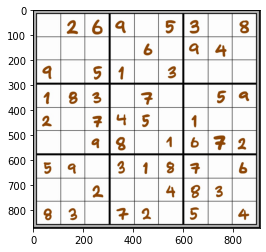

In [129]:
puzzle = cv2.imread('C:/Users/Win10/Desktop/New Folder/example9x9, 1.jpg')

plt.imshow(puzzle)

#### Convert to Gray Scale

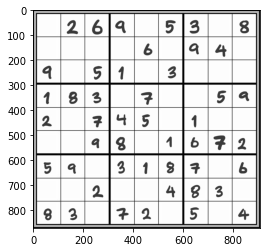

In [130]:
gray = cv2.cvtColor(puzzle, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap = 'gray')

#### Convert to Black/White

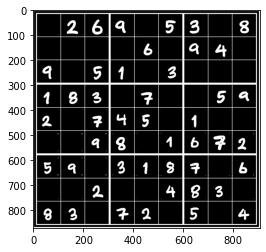

In [131]:
gray = cv2.bitwise_not(gray)

bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

plt.imshow(bw, cmap = 'gray')

In [132]:
hori = np.copy(bw)
vert = np.copy(bw)

hori.shape
# plt.imshow(hori, cmap = 'gray')

(870, 906)

In [133]:
cols = hori.shape[1]
hori_size = cols // 10

In [134]:
horiStruct = cv2.getStructuringElement(cv2.MORPH_RECT, (hori_size, 1))

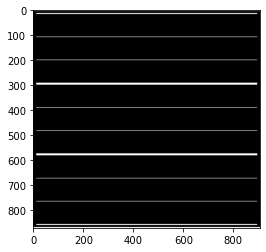

In [135]:
hori = cv2.erode(hori, horiStruct)
hori = cv2.dilate(hori, horiStruct)

plt.imshow(hori, cmap = 'gray')

In [136]:
rows = vert.shape[1]
vert_size = rows // 10

In [137]:
vertStruct = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vert_size))

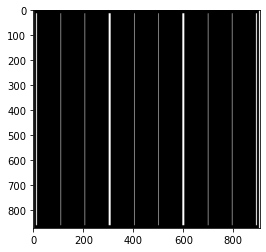

In [138]:
vert = cv2.erode(vert, vertStruct)
vert = cv2.dilate(vert, vertStruct)

plt.imshow(vert, cmap = 'gray')

#### Concatenate horizontal and vertical

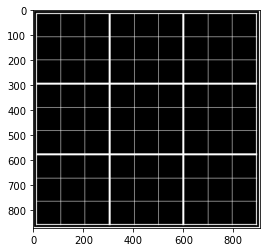

In [139]:
newImage1 = cv2.bitwise_or(vert, hori)

plt.imshow(newImage1, cmap = 'gray')

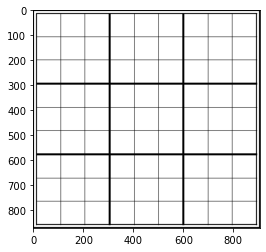

In [140]:
newImage2 = cv2.bitwise_not(newImage1)

plt.imshow(newImage2, cmap = 'gray')

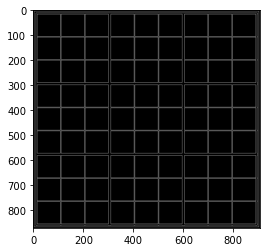

In [141]:
edges = cv2.adaptiveThreshold(newImage2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -2)

plt.imshow(edges, cmap = 'gray')

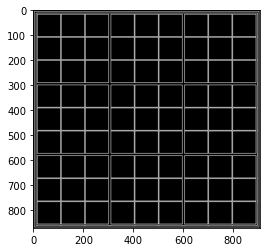

In [142]:
kernel = np.ones((2, 2), np.uint8)
newEdges = cv2.dilate(edges, kernel)

plt.imshow(newEdges, cmap = 'gray')

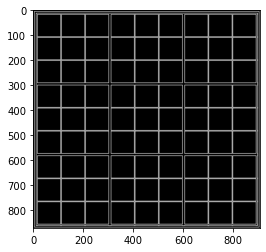

In [143]:
smooth = cv2.blur(newEdges, (2, 2))

plt.imshow(smooth, cmap = 'gray')

#### Finding Contours

In [144]:
cnt, hier = cv2.findContours(smooth, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [145]:
copy2 = puzzle.copy()

In [146]:
cv2.drawContours(copy2, cnt, contourIdx = -1, color = (0, 0, 255), thickness = 2, lineType = cv2.LINE_AA)

array([[[  9,   9,   9],
        [  5,   5,   5],
        [  0,   0,   0],
        ...,
        [  6,   6,   6],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  5,   5,   5],
        [  7,   7,   7],
        [  0,   0,   0],
        ...,
        [  2,   2,   2],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,  27],
        [  7,   7,   7],
        [  7,   7,   7]],

       ...,

       [[  4,   4,   4],
        [  3,   3,   3],
        [  0,   0,  92],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  3,   3, 100]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [ 12,  12,  16],
        ...,
        [  0,   0, 255],
        [  0,   0, 125],
        [  0,   0,   4]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [ 11,  11,  11],
        ...,
        [  7,   7,  43],
        [  0,   0,   4],
        [  0,   0,   0]]

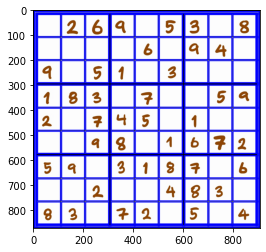

In [147]:
plt.imshow(copy2, cmap = 'gray')

In [148]:
from imutils import contours

cnt, _ = contours.sort_contours(cnt, method = 'left-to-right')
cnt, _ = contours.sort_contours(cnt, method = 'top-to-bottom')

#### Bounding Rectangle

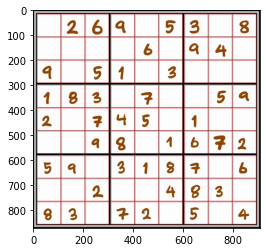

In [149]:
copy2 = puzzle.copy()

count = 0

for c in cnt:
    if(cv2.contourArea(c) > 2500 and cv2.contourArea(c) < 12000):
        # > 6500, < 7000       # For 16x16, 25x25
        # > 2500, < 12000      # For 9x9
        count = count + 1
        rect = cv2.boundingRect(c)
        x, y, w, h = rect
        cv2.rectangle(copy2, (x, y), (x+w, y+h), (255, 0, 0), 1)
        plt.imshow(copy2)

In [150]:
print(len(cnt))

94


In [151]:
import imageio

copy2 = puzzle.copy()

count = 0

for c in cnt:
    if(cv2.contourArea(c) > 2500 and cv2.contourArea(c) < 12000):
        count = count + 1
        rect = cv2.boundingRect(c)
        x, y, w, h = rect
        array = np.array(copy2[y:y+h, x:x+w])  
        imageio.imwrite('C:/Users/Win10/Desktop/numbers/image_{}.jpeg'.format(count), array)
        print(array)

[[[254 254 254]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [255 255 255]
  [222 222 222]]

 [[253 253 253]
  [252 252 252]
  [252 252 252]
  ...
  [252 252 252]
  [255 255 255]
  [222 222 222]]

 [[253 253 253]
  [252 252 252]
  [253 253 253]
  ...
  [254 254 254]
  [255 255 255]
  [222 222 222]]

 ...

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [223 223 223]]

 [[251 251 251]
  [249 249 249]
  [251 251 251]
  ...
  [244 244 244]
  [253 253 253]
  [225 225 225]]

 [[219 219 219]
  [221 221 221]
  [219 219 219]
  ...
  [219 219 219]
  [224 224 224]
  [198 198 198]]]
[[[254 254 254]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [255 255 255]
  [222 222 222]]

 [[253 253 253]
  [252 252 252]
  [252 252 252]
  ...
  [252 252 252]
  [255 255 255]
  [222 222 222]]

 [[253 253 253]
  [252 252 252]
  [253 253 253]
  ...
  [254 254 254]
  [255 255 255]
  [222 222 222]]

 ...

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ..

# ---------------------------------------------------------------------------------------------------------

## Convolutional Neural Network

### Single Digit

#### Downloading MNIST Dataset

In [ ]:
# MNIST

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

In [ ]:
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train.shape

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

num_classes

#### CNN Model for 9x9 Sudoku detection

In [ ]:
model = Sequential()
model.add(Convolution2D(24, (5, 5), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(padding = 'same'))

model.add(Convolution2D(48, (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(padding = 'same'))

model.add(Convolution2D(64, (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
history = model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test), verbose = 1)

### Double Digit MNIST

In [ ]:
# Double Digit MNIST

# doubleDigit = tf.keras.utils.image_dataset_from_directory('C:/Users/Win10/Desktop/double_mnist_seed_123_image_size_64_64/')

directory = r"C:\Users\Win10\Desktop\double_mnist_seed_123_image_size_64_64"

catagories = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']

data = []

for cata in catagories:
    folder = os.path.join(directory, cata)
    label = catagories.index(cata)
    # print(folder)
    
    for doubleDigit in os.listdir(folder):
        doubleDigit = os.path.join(folder, doubleDigit)
        doubleDigit_arr = cv2.imread(doubleDigit)
        # doubleDigit_arr = cv2.resize(doubleDigit_arr, (28, 28))
        doubleDigit_arr = cv2.cvtColor(doubleDigit_arr, cv2.COLOR_BGR2GRAY)
        
        data.append([doubleDigit_arr, label])

In [ ]:
x2 = []
y2 = []

for feats, labels in data:
    x2.append(feats)
    y2.append(labels)

In [ ]:
x2 = np.array(x2)
y2 = np.array(y2)

In [ ]:
x2.reshape(x2.shape[0], 64, 64, 1)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.1, random_state = 1)

In [ ]:
#y2_train = to_categorical(y2_train)
#y2_test = to_categorical(y2_test)

#y2_train.reshape(-1, 1)
#y2_test.reshape(-1, 1)

print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

In [ ]:
# xnewtrain = np.concatenate([x_train, x2_train])
# print(xnewtrain.shape)

# xnewtest = np.concatenate([x_test, x2_test])
# print(xnewtest.shape)

# ynewtrain = np.concatenate([y_train, y2_train], axis = -1)
# print(ynewtrain.shape)

# ynewtest = np.concatenate([y_test, y2_test], axis = -1)
# print(ynewtest.shape)

In [ ]:
x2_train = x2_train.reshape(x2_train.shape[0], 64, 64, 1)
print(x2_train.shape)

x2_test = x2_test.reshape(x2_test.shape[0], 64, 64, 1)
print(x2_test.shape)

y2_train = to_categorical(y2_train)
print(y2_train.shape)

y2_test = to_categorical(y2_test)
print(y2_test.shape)

#### Test CNN for double digits (0-25)

In [ ]:
testMod = Sequential()

testMod.add(Convolution2D(24, (5, 5), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)))
testMod.add(MaxPooling2D(padding = 'same'))

testMod.add(Convolution2D(48, (5, 5), activation = 'relu', padding = 'same'))
testMod.add(MaxPooling2D(padding = 'same'))

testMod.add(Convolution2D(64, (5, 5), activation = 'relu', padding = 'same'))
testMod.add(MaxPooling2D(padding = 'same'))

testMod.add(Flatten())
testMod.add(Dense(256, activation = 'relu'))
testMod.add(Dense(26, activation = 'softmax'))

testMod.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
print(x2_train.shape)
print(y2_train.shape)

print(x2_test.shape)
print(y2_test.shape)

In [ ]:
# Double Digit MODEL

testHistory = testMod.fit(x2_train, y2_train, epochs = 3, validation_data = (x2_test, y2_test), verbose = 1)

### Saving model

In [ ]:
# !mkdir -p saved_model

model.save('C:/Users/Win10/Desktop/saved_model/my_model')

In [ ]:
testMod.save('C:/Users/Win10/Desktop/saved_model/test_model')

### Loading model

In [152]:
# Single digit model

newModel = models.load_model('C:/Users/Win10/Desktop/saved_model/my_model')

In [ ]:
# Double digit model

# newModel = models.load_model('C:/Users/Win10/Desktop/saved_model/test_model')

### Predicting

In [153]:
def bwImage(file):
    im = cv2.imread(file)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    threshold, bw = cv2.threshold(im_gray, 125, 255, cv2.THRESH_BINARY_INV)
    return bw

def processImage(image):
    # Region of interest
    reg = cv2.resize(image, (28, 28))
    # reg = cv2.resize(image, (64, 64))
    reg = reg.astype("float") / 255
    reg = tf.keras.preprocessing.image.img_to_array(reg)
    reg = np.expand_dims(reg, axis = 0)
    return reg

# x = 'C:/Users/Win10/Desktop/numbers/image_1.jpeg'
# xt = bwImage(x)
# xt = cv2.resize(xt, (64, 64))
# plt.imshow(xt)

In [154]:
i = 1
num = []

for file in os.listdir('C:/Users/Win10/Desktop/numbers'):
    file_path = ('C:/Users/Win10/Desktop/numbers/image_{}'.format(i)+".jpeg")
    bw = bwImage(file_path)
    image = processImage(bw)
    if(np.count_nonzero(image) == 0):
        num.append(0)
    else:
        prediction = newModel.predict(image)
        num.append(prediction.argmax())
    i = i + 1

In [155]:
len(num)

81

In [156]:
def divide(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

n = 9
sudoku = list(divide(num, n))

print(sudoku)

[[0, 2, 6, 9, 0, 5, 3, 0, 8], [0, 0, 0, 0, 6, 0, 9, 4, 0], [9, 0, 5, 1, 0, 3, 0, 0, 0], [1, 8, 3, 0, 7, 0, 0, 5, 9], [2, 0, 7, 4, 5, 0, 1, 0, 0], [0, 0, 9, 8, 0, 1, 6, 7, 2], [5, 9, 0, 3, 1, 8, 7, 0, 6], [0, 0, 2, 0, 0, 4, 8, 3, 0], [8, 3, 0, 7, 2, 0, 5, 0, 4]]


In [157]:
sudoku

[[0, 2, 6, 9, 0, 5, 3, 0, 8],
 [0, 0, 0, 0, 6, 0, 9, 4, 0],
 [9, 0, 5, 1, 0, 3, 0, 0, 0],
 [1, 8, 3, 0, 7, 0, 0, 5, 9],
 [2, 0, 7, 4, 5, 0, 1, 0, 0],
 [0, 0, 9, 8, 0, 1, 6, 7, 2],
 [5, 9, 0, 3, 1, 8, 7, 0, 6],
 [0, 0, 2, 0, 0, 4, 8, 3, 0],
 [8, 3, 0, 7, 2, 0, 5, 0, 4]]

# ---------------------------------------------------------------------------------------------------------

## Depth First Search (DFS)

#### Main

In [161]:
check = 0

def GetSize():
    global bn
    global values
    global PUZZLE
    global check
    PUZZLE = []
    while check == 0:
        print("Select the Size of Puzzle (9x9, 16x16, 25x25)")
        SIZE = int(input(" 9 or 16 or 25\n"))
        if SIZE == 9:
            bn = 3
            values = range(1, 10)
            check += 1
            print("Load data from image? (Y/N)")
            comv = str(input())
            if comv == 'Y':
                PUZZLE = sudoku
                continue
            Input = [int(num) for num in input("Enter Sudoku Puzzle\n").split()]
            PUZZLE = [Input[i:i + SIZE] for i in range(0, len(Input), SIZE)]
        elif SIZE == 16:
            bn = 4
            values = range(1, 17)
            check += 1
            Input = [int(num) for num in input("Enter Sudoku Puzzle\n").split()]
            PUZZLE = [Input[i:i + SIZE] for i in range(0, len(Input), SIZE)]
        elif SIZE == 25:
            bn = 5
            values = range(1, 26)
            check += 1
            Input = [int(num) for num in input("Enter Sudoku Puzzle\n").split()]
            PUZZLE = [Input[i:i + SIZE] for i in range(0, len(Input), SIZE)]
        else:
            print("Invalid Input")

    return bn, values, PUZZLE

GetSize()
# print("bn = {}".format(bn))
# print("Values = {}".format(values))
print("Puzzle : ")
for i in PUZZLE:
  print(i)

Select the Size of Puzzle (9x9, 16x16, 25x25)
 9 or 16 or 25
9
Load data from image? (Y/N)
N
Enter Sudoku Puzzle
1 2 5 0 0 3 0 0 7  0 0 0 0 0 4 5 1 2  8 0 7 0 5 1 0 0 3  3 0 6 8 4 0 1 2 0  4 0 8 5 0 0 6 0 0  2 5 0 0 3 0 0 7 8  0 0 4 0 2 0 0 9 6  0 1 2 0 9 6 0 8 0  9 6 3 4 7 8 2 5 1
Puzzle : 
[1, 2, 5, 0, 0, 3, 0, 0, 7]
[0, 0, 0, 0, 0, 4, 5, 1, 2]
[8, 0, 7, 0, 5, 1, 0, 0, 3]
[3, 0, 6, 8, 4, 0, 1, 2, 0]
[4, 0, 8, 5, 0, 0, 6, 0, 0]
[2, 5, 0, 0, 3, 0, 0, 7, 8]
[0, 0, 4, 0, 2, 0, 0, 9, 6]
[0, 1, 2, 0, 9, 6, 0, 8, 0]
[9, 6, 3, 4, 7, 8, 2, 5, 1]


In [162]:
#------------------------ CHECKING PART ------------------------

def DataCheck(data):  # Check the data
    notzero = list(filter(lambda x: x != 0, data)) # get non zero data
    return len(notzero) == len(set(notzero))

def GetCol(puzzle):  # Get the Column List
    dimensions = range(len(puzzle)) # dim = 9 , 16, 25
    columns = []
    for i in dimensions:
        columns.append([]) # Create Empty list [[], [], ...]
    for r in dimensions:
        for c in dimensions:
            columns[c].append(puzzle[r][c]) # Create "Column list" [[0,0,1,...], [6,0,8,...], ... ,[...]]
    return columns
        
def GetSqu(puzzle):  # Get the Square List
    dimensions = range(len(puzzle)) # dim = 9 , 16, 25
    squares = []
    for i in dimensions:
        squares.append([]) # Create Empty list [[], [], ...]
    for r in dimensions:
        for c in dimensions:
            s = ((r//bn)*bn)+(c//bn)
            squares[s].append(puzzle[r][c])
    return squares

def CHECK(puzzle):
    CorrectRows = all(map(DataCheck, puzzle)) # Check Rows
    if not CorrectRows:
        return False
    
    columns = GetCol(puzzle)
    CorrectCols = all(map(DataCheck, columns)) # Check Columns
    if not CorrectCols:
        return False
    
    squares = GetSqu(puzzle)
    CorrectSqus = all(map(DataCheck, squares)) # Check Squares
    if not CorrectSqus:
        return False
    return True

#--------------------- SOLVING PART ----------------------------

def FindEmptyData(puzzle):
    for r in range(len(puzzle)):
        for c in range(len(puzzle)):
            if puzzle[r][c] == 0:
                return (r, c)
    return None

count = 0
def Solve(puzzle):
    global count
    EmptyIndex = FindEmptyData(puzzle)
    if EmptyIndex is None:
        print("\n*** Congratulaion! The Puzzle is solved! ***")
        return puzzle
    
    r, c = EmptyIndex
    for num in values:
        puzzle[r][c] = num  # TRYING TO SOLVE
        count += 1
        print("Step {}".format(count))
        # print(puzzle)
        for i in puzzle:
            print(i)
        if not CHECK(puzzle):  # Check
            continue
        SolvedPuzzle = Solve(puzzle)
        if SolvedPuzzle is not None:
            return SolvedPuzzle
    puzzle[r][c] = 0

In [163]:
# PUZZLE = sudoku

for i in Solve(PUZZLE):
    print(i)

print("SOLVED IN {} STEPS".format(count))

Step 1
[1, 2, 5, 1, 0, 3, 0, 0, 7]
[0, 0, 0, 0, 0, 4, 5, 1, 2]
[8, 0, 7, 0, 5, 1, 0, 0, 3]
[3, 0, 6, 8, 4, 0, 1, 2, 0]
[4, 0, 8, 5, 0, 0, 6, 0, 0]
[2, 5, 0, 0, 3, 0, 0, 7, 8]
[0, 0, 4, 0, 2, 0, 0, 9, 6]
[0, 1, 2, 0, 9, 6, 0, 8, 0]
[9, 6, 3, 4, 7, 8, 2, 5, 1]
Step 2
[1, 2, 5, 2, 0, 3, 0, 0, 7]
[0, 0, 0, 0, 0, 4, 5, 1, 2]
[8, 0, 7, 0, 5, 1, 0, 0, 3]
[3, 0, 6, 8, 4, 0, 1, 2, 0]
[4, 0, 8, 5, 0, 0, 6, 0, 0]
[2, 5, 0, 0, 3, 0, 0, 7, 8]
[0, 0, 4, 0, 2, 0, 0, 9, 6]
[0, 1, 2, 0, 9, 6, 0, 8, 0]
[9, 6, 3, 4, 7, 8, 2, 5, 1]
Step 3
[1, 2, 5, 3, 0, 3, 0, 0, 7]
[0, 0, 0, 0, 0, 4, 5, 1, 2]
[8, 0, 7, 0, 5, 1, 0, 0, 3]
[3, 0, 6, 8, 4, 0, 1, 2, 0]
[4, 0, 8, 5, 0, 0, 6, 0, 0]
[2, 5, 0, 0, 3, 0, 0, 7, 8]
[0, 0, 4, 0, 2, 0, 0, 9, 6]
[0, 1, 2, 0, 9, 6, 0, 8, 0]
[9, 6, 3, 4, 7, 8, 2, 5, 1]
Step 4
[1, 2, 5, 4, 0, 3, 0, 0, 7]
[0, 0, 0, 0, 0, 4, 5, 1, 2]
[8, 0, 7, 0, 5, 1, 0, 0, 3]
[3, 0, 6, 8, 4, 0, 1, 2, 0]
[4, 0, 8, 5, 0, 0, 6, 0, 0]
[2, 5, 0, 0, 3, 0, 0, 7, 8]
[0, 0, 4, 0, 2, 0, 0, 9, 6]
[0, 1, 2, 0, 9, 6, 0